In [2]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
# Path to the uploaded zip file
zip_file_path = r'C:/Users/LENOVO/Downloads/twitter_training.csv.zip'
csv_file_name = 'twitter_training.csv'



In [4]:
# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('C:/Users/LENOVO/Downloads')


In [5]:
# Load the extracted CSV file into a DataFrame
data = pd.read_csv(f'C:/Users/LENOVO/Downloads/{csv_file_name}')


In [6]:
# Display the first few rows to understand the structure
print(data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [7]:
print(data.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [8]:
# Rename the columns for clarity
data.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']



In [9]:
# Display the first few rows of the DataFrame with the new column names
data.head()

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


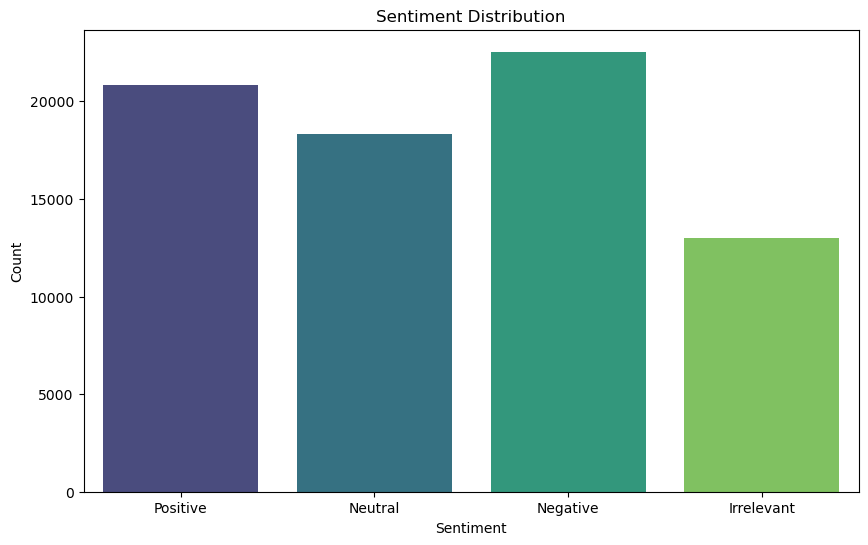

In [10]:
# Plot the overall sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


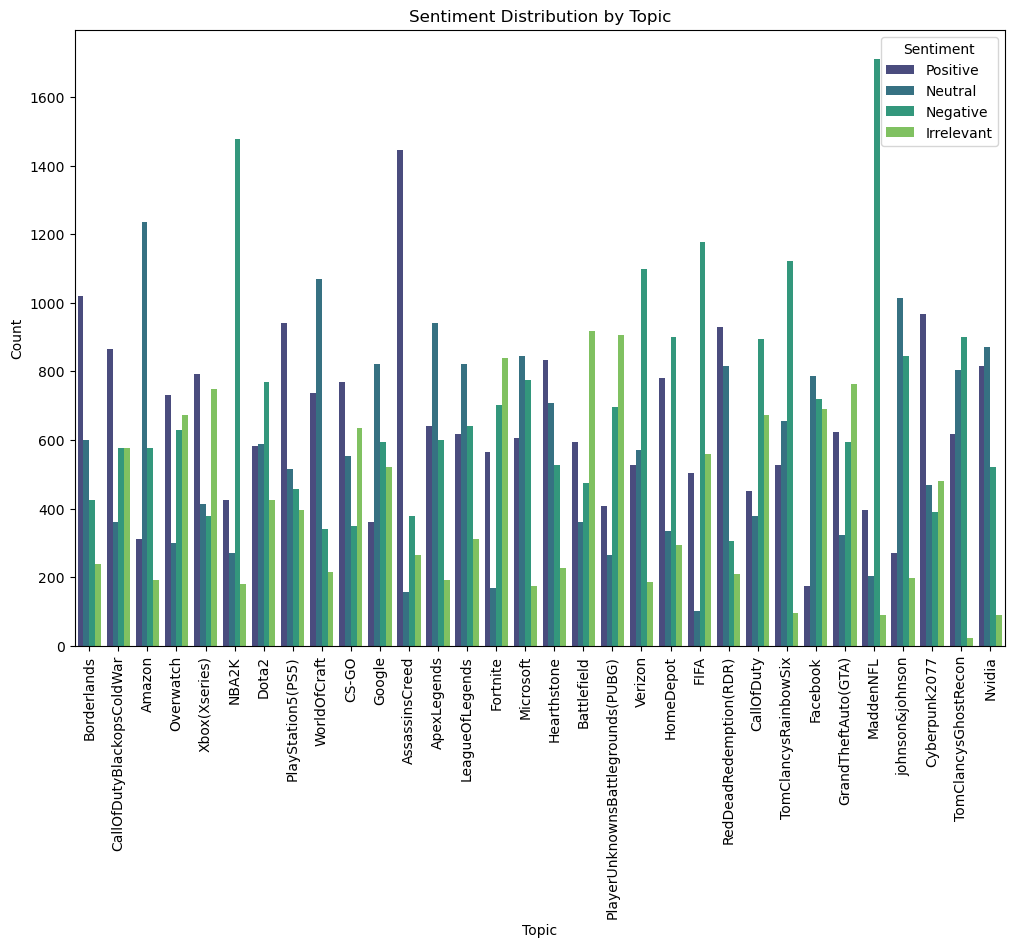

In [11]:
# Plot sentiment distribution by topic
plt.figure(figsize=(12, 8))
sns.countplot(x='Topic', hue='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Function to generate word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


In [13]:
# Remove rows with NaN in the 'Tweet' column
data = data.dropna(subset=['Tweet'])



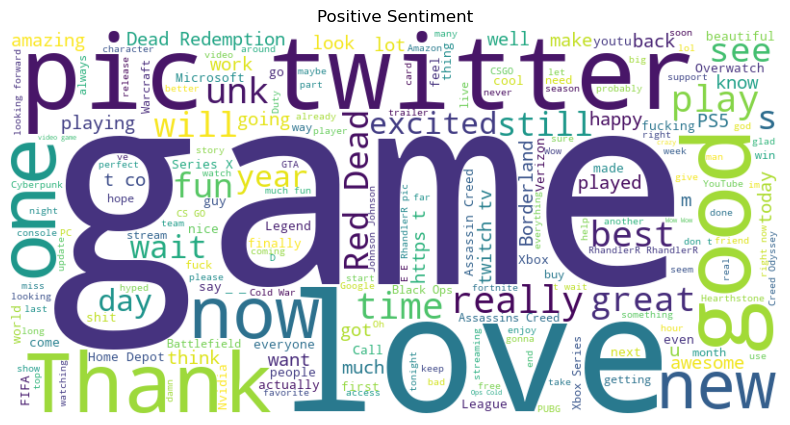

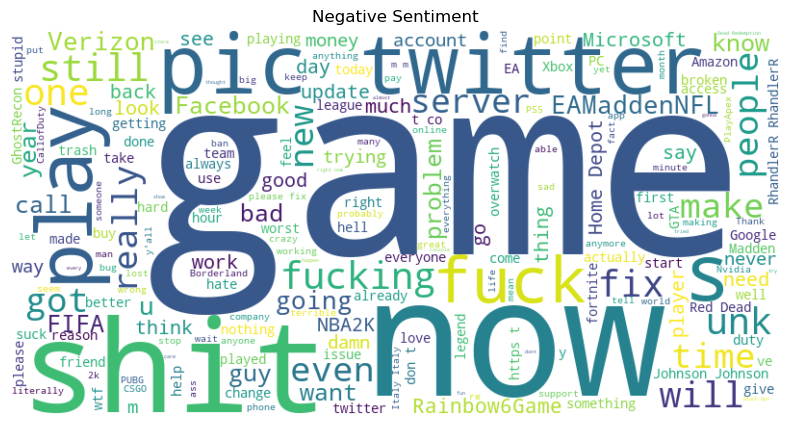

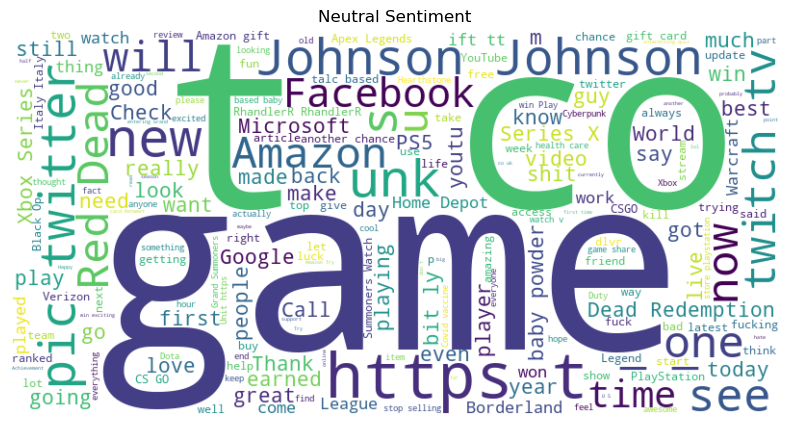

In [47]:
# Generate word clouds for each sentiment
positive_text = ' '.join(data[data['Sentiment'] == 'Positive']['Tweet'])
negative_text = ' '.join(data[data['Sentiment'] == 'Negative']['Tweet'])
neutral_text = ' '.join(data[data['Sentiment'] == 'Neutral']['Tweet'])

generate_wordcloud(positive_text, 'Positive Sentiment')
generate_wordcloud(negative_text, 'Negative Sentiment')
generate_wordcloud(neutral_text, 'Neutral Sentiment')
